In [6]:
setwd('../../')
source('.Rprofile')
setwd('./benchmark/analysis')

library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)
library(patchwork)

In [7]:
data <- read_csv('../results/benchmark.csv')
data$cells <- as.numeric(data$cells)
data <- data[data$global_score > 0,]
data <- data[data$cells == 0,] %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'PCA')) %>% 
        mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data[nrow(data) + 1,] <- list("stereo_mouse_embryo",0,0,'PASTE',NA,NA,NA,NA,NA,NA) # PASTE can not run on Stereo-seq
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
data %>% tail(5)

Rows: 112 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (8): cells, seed, celltype_score, edge_score, euclidean_dis, global_scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
visium_human_DLPFC,0,7,PASTE,0.7431296,-22.83455,0.04024688,0.6410544,0.8292204,43.72235
visium_human_DLPFC,0,7,SLAT,0.8283791,-34.21088,0.02549772,0.6878856,0.8143578,16.35100
visium_human_DLPFC,0,7,STAGATE,0.7602356,-83.67246,0.12710486,0.5844083,0.7428491,24.35648
visium_human_DLPFC,0,7,Seurat,0.8623107,-45.73528,0.17404606,0.6096467,0.6710600,120.94300
stereo_mouse_embryo,0,0,PASTE,NA,NA,NA,NA,NA,NA


In [8]:
data <- data %>% 
  mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
  mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
  mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq'))
data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
data$method <- factor(data$method, levels = c('SLAT','SLAT_dpca','SLAT_harmony','Harmony','Seurat','PASTE','STAGATE','PCA'))
data %>% tail()

dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Visium,0,7,Harmony,0.8965227,-42.64722,0.17537200,0.6132922,0.6550757,9.992527
Visium,0,7,PASTE,0.7431296,-22.83455,0.04024688,0.6410544,0.8292204,43.722354
Visium,0,7,SLAT,0.8283791,-34.21088,0.02549772,0.6878856,0.8143578,16.350999
Visium,0,7,STAGATE,0.7602356,-83.67246,0.12710486,0.5844083,0.7428491,24.356482
Visium,0,7,Seurat,0.8623107,-45.73528,0.17404606,0.6096467,0.6710600,120.943000
Stereo-seq,0,0,PASTE,NA,NA,NA,NA,NA,NA


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


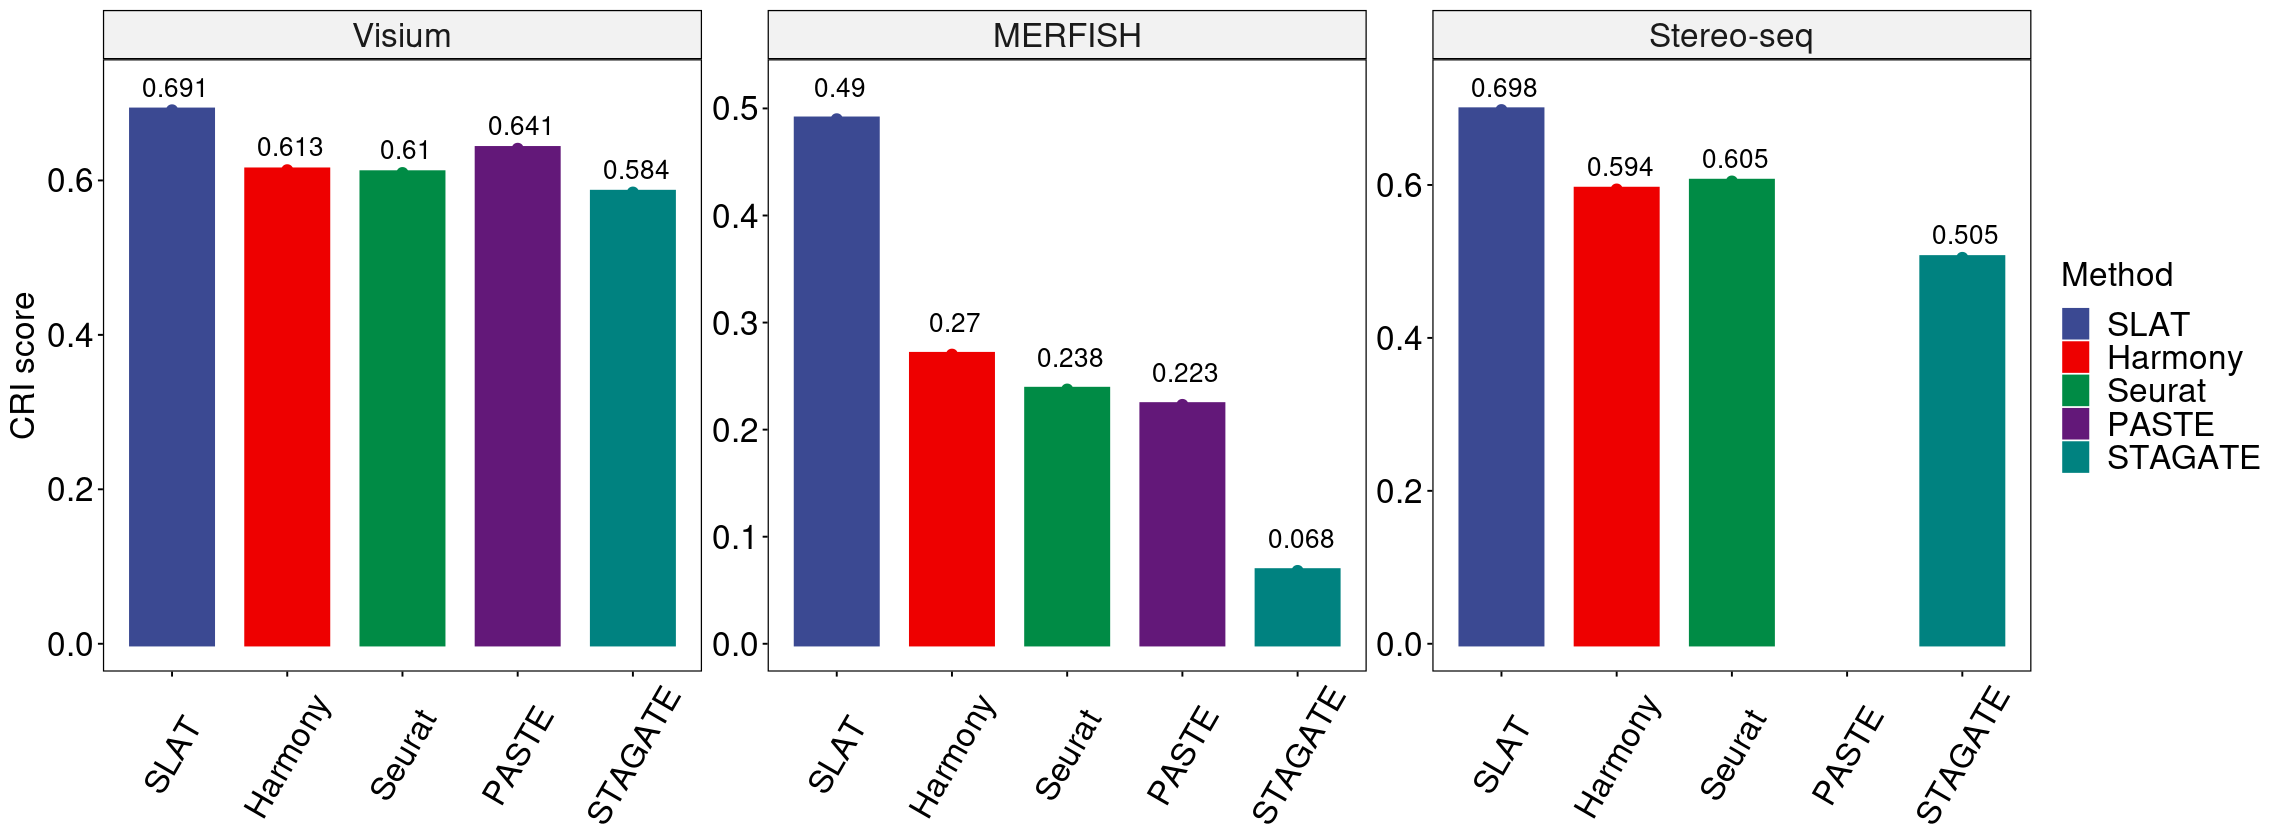

In [9]:
options(repr.plot.width=19, repr.plot.height=7)
ggbarplot(data, x="method", y="global_score", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='CRI score', size=1.5, lab.size=5, facet.by='dataset', label=F, label.pos="out",
        legend.title='Method') %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.03, label = paste("", round(mean(x), 3))), geom="text",size=5.5) +
facet_wrap(~dataset, scales="free")+
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


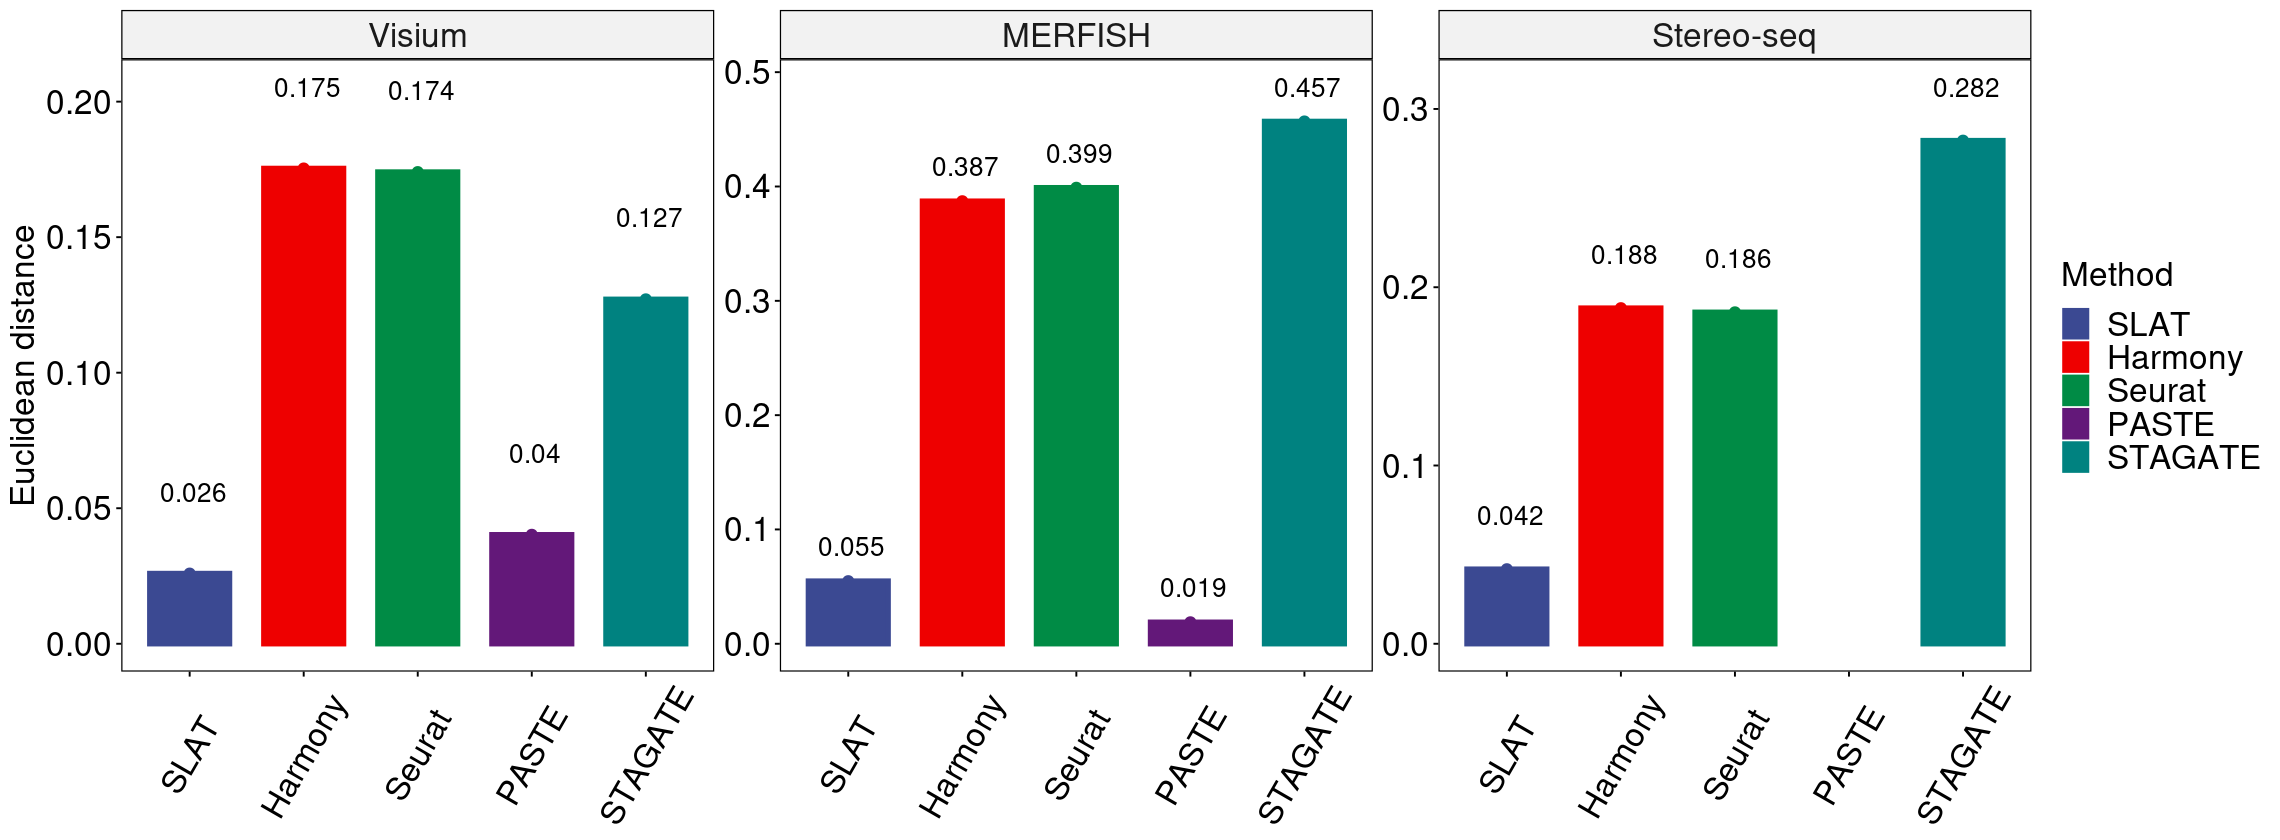

In [10]:
options(repr.plot.width=19, repr.plot.height=7)
ggbarplot(data, x="method", y="euclidean_dis", fill='method', color='method', add="mean_se", error.plot="pointrange",
        palette='aaas', xlab=F ,ylab='Euclidean distance', size=1.5, lab.size=5, facet.by='dataset',label = F, label.pos = "out",
        legend.title = 'Method') %>% 
ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) +
stat_summary(fun.data = function(x) data.frame(y = mean(x)+0.03, label = paste("", round(mean(x), 3))), geom="text",size=5.5) +
facet_wrap(~dataset, scales="free")+
theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=20))


Warning message in base::min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in base::max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


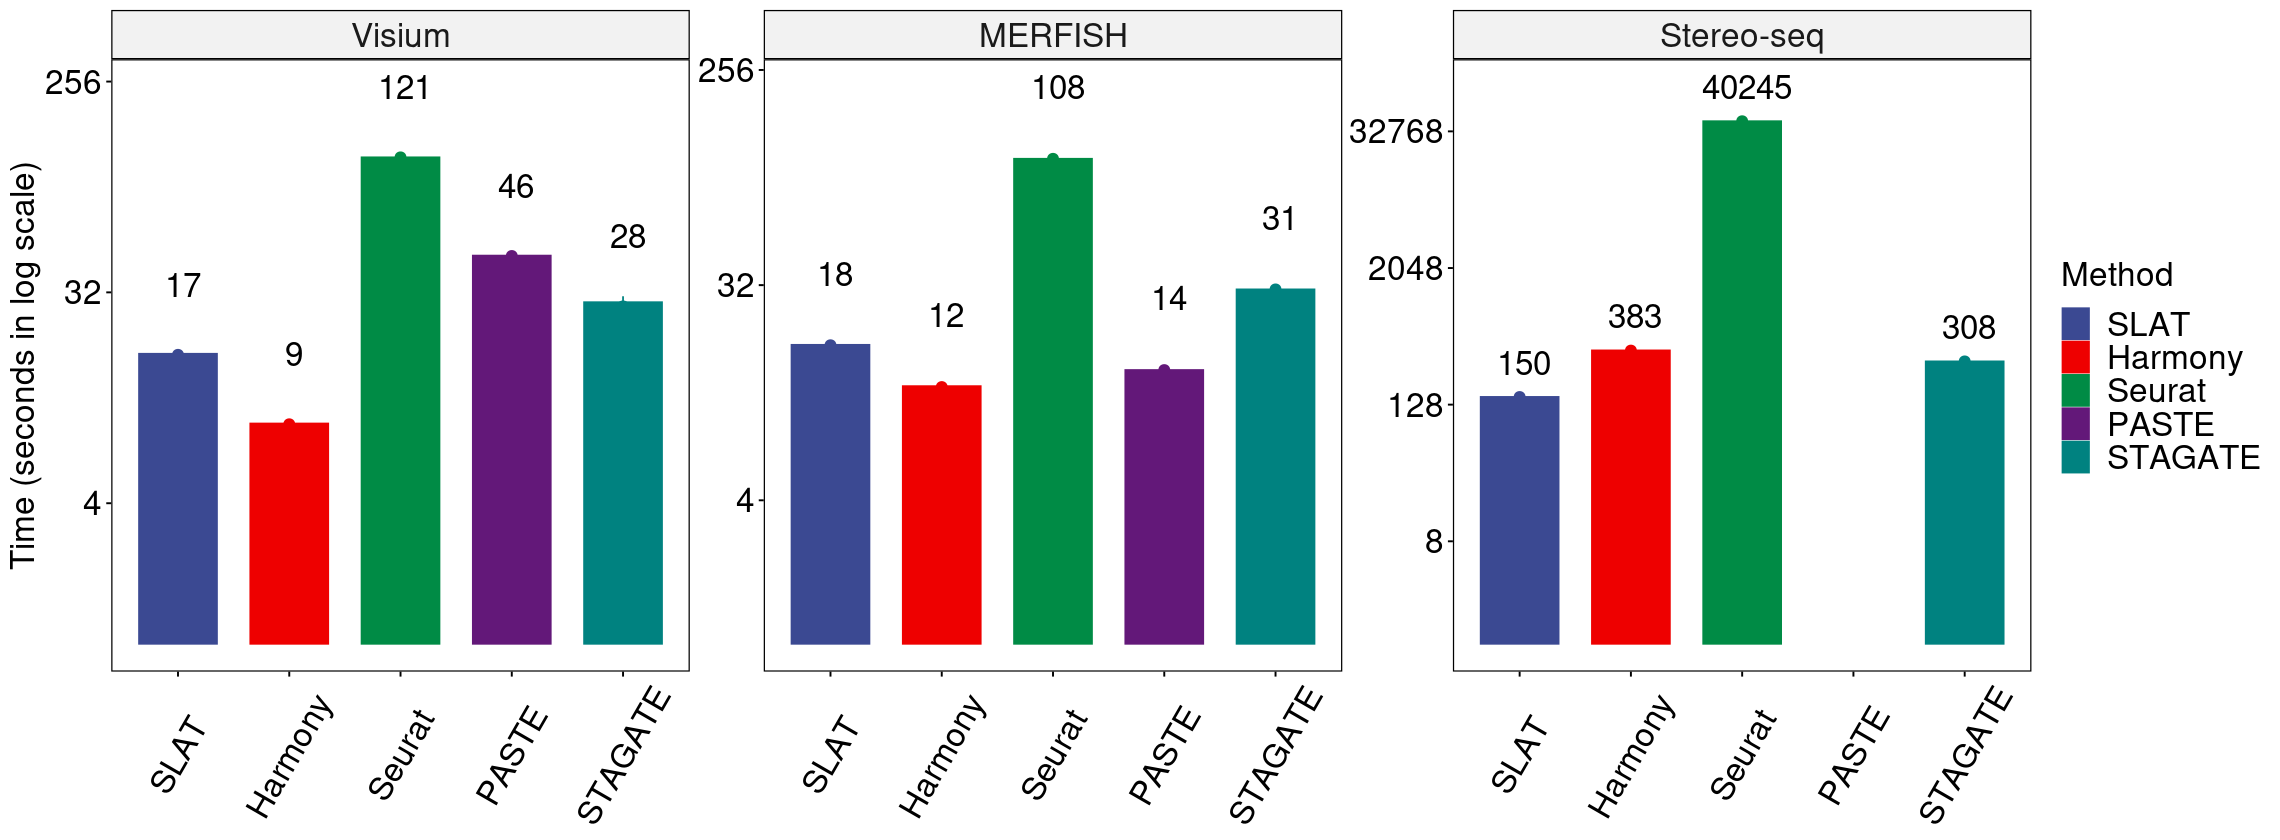

In [11]:
options(repr.plot.width=19, repr.plot.height=7)
p1 <- ggbarplot(data, x="method", y="run_time", fill='method', color='method', label=F, add="mean_se", error.plot="pointrange",
      palette='aaas', facet.by='dataset', xlab =F, ylab='Time (seconds in log scale)', size=0.5, lab.size=10, legend.title = 'Method') %>% 
      ggpar(legend='right', font.legend=20, font.subtitle=20, font.xtickslab=20, font.ytickslab=20, font.y=20) + scale_y_continuous(trans='log2') + 
      stat_summary(fun.data = function(x) data.frame(y = mean(x)+1, label = paste("", round(2^(mean(x)), 0))), geom="text",size=7) +
      facet_wrap(~dataset, scales="free")+
      theme(axis.text.x=element_text(angle=60, vjust=0.5, hjust=0.5),strip.text.x=element_text(size=20))
print(p1)